<a href="https://colab.research.google.com/github/SisekoC/My-Notebooks/blob/main/digit_recognition_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional neural network - Handwritten digits MNIST

In [1]:
%tensorflow_version 2.x
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba danych treningowych: ', X_train.shape[0])
print('Liczba danych testowych: ', X_test.shape[0])
print('Rozmiar pojedynczego obrazka: ', X_train[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba danych treningowych:  60000
Liczba danych testowych:  10000
Rozmiar pojedynczego obrazka:  (28, 28)


(-0.5, 27.5, 27.5, -0.5)

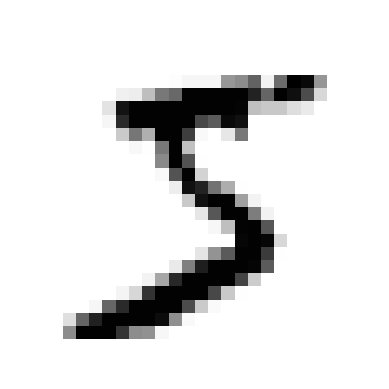

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.axis('off')

In [5]:
print(keras.backend.image_data_format())

channels_last


In [6]:
img_rows, img_cols = 28, 28
if keras.backend.image_data_format() == 'channel_first':
  X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

print(input_shape)

(28, 28, 1)


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [9]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

### Building the model

In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adadelta',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1886 - loss: 2.2792 - val_accuracy: 0.3187 - val_loss: 2.2090
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3462 - loss: 2.1814 - val_accuracy: 0.4227 - val_loss: 2.0772
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4700 - loss: 2.0366 - val_accuracy: 0.5647 - val_loss: 1.8725
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5968 - loss: 1.8129 - val_accuracy: 0.6794 - val_loss: 1.5709
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7060 - loss: 1.4940 - val_accuracy: 0.7650 - val_loss: 1.2118
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7775 - loss: 1.1487 - val_accuracy: 0.8179 - val_loss: 0.9071
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8167 - loss: 0.8737 - val_accuracy: 0.8401 - val_loss: 0.7143
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8381 - loss: 0.6999 - val_accuracy: 0

In [17]:
def make_accuracy_plot(history):
  """
  Funkcja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym i walidacyjnym.
  """
  accuracy, val_accuracy = history.history['accuracy'], history.history['val_accuracy']
  epochs = range(1, len(accuracy) + 1)

  plt.figure(figsize=(10, 8))
  plt.plot(epochs, accuracy, label='Accuracy of training', marker='o')
  plt.plot(epochs, val_accuracy, label='Validation accuracy', marker='o')
  plt.legend()
  plt.title('Accuracy of training and validation')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.show()

def make_loss_plot(history):
  """
  The function returns a graph of the model's takeoff (loss) on the training and validation set.
  """
  loss, val_loss = history.history['loss'], history.history['val_loss']
  epochs = range(1, len(loss) + 1)

  plt.figure(figsize=(10, 8))
  plt.plot(epochs, loss, label='Training loss', marker='o')
  plt.plot(epochs, val_loss, label='Loss of validation', marker='o')
  plt.legend()
  plt.title('Loss of training and validation')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

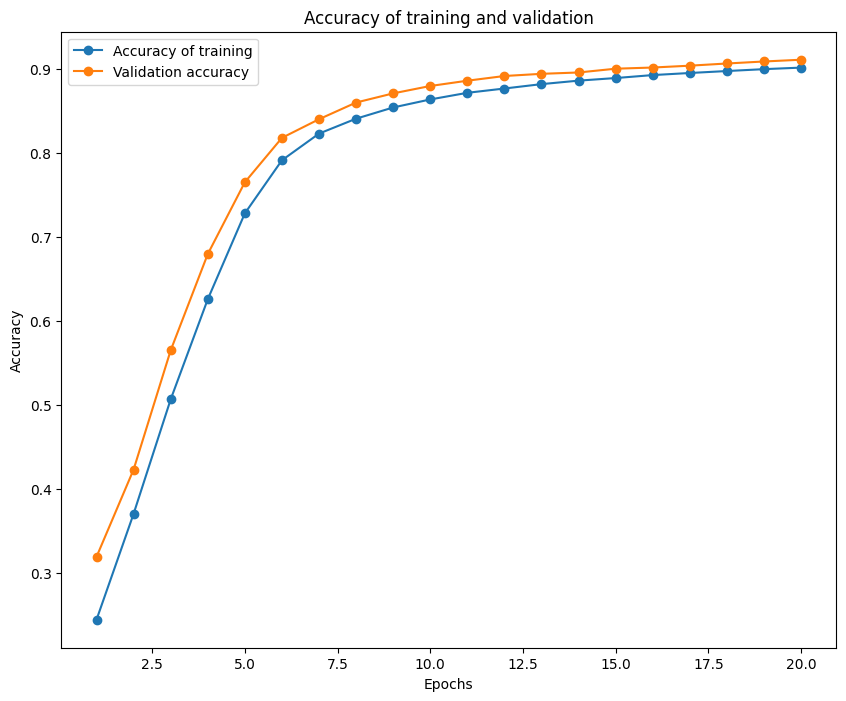

In [18]:
make_accuracy_plot(history)

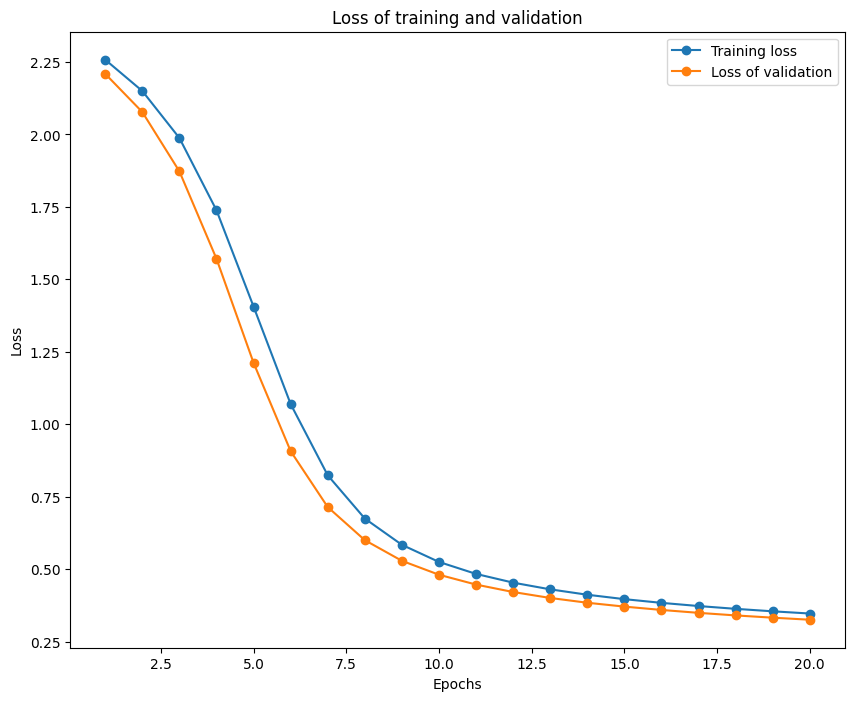

In [19]:
make_loss_plot(history)

In [20]:
history = model.fit(X_train, y_train, batch_size=128, epochs=4, validation_data=(X_test, y_test))

Epoch 1/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9029 - loss: 0.3368 - val_accuracy: 0.9129 - val_loss: 0.3192
Epoch 2/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9038 - loss: 0.3365 - val_accuracy: 0.9138 - val_loss: 0.3132
Epoch 3/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9079 - loss: 0.3280 - val_accuracy: 0.9152 - val_loss: 0.3080
Epoch 4/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9068 - loss: 0.3261 - val_accuracy: 0.9165 - val_loss: 0.3029


### Model evaluation

In [21]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9165 - loss: 0.3029


[0.3028619885444641, 0.9164999723434448]

In [22]:
import pandas as pd

metrics = pd.DataFrame(history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.903317,0.340143,0.9129,0.319197
1,0.904683,0.333857,0.9138,0.313196
2,0.906750,0.328040,0.9152,0.307995
3,0.908050,0.322589,0.9165,0.302862
